<a href="https://colab.research.google.com/github/LeowYR/DSL_Homework/blob/main/T01_grp_2_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

1. A self-contained `ipynb` file with:  
   - **Verilog code** (module, testbench, and waveform screenshots).  
   - **Google Colab/GitHub link** for collaboration.  
   - **Demo video** (showing switch inputs and LED outputs).  
   - **Brief report** documenting design steps, challenges, and lessons learned.
   - The report should present how AI is used in the design (if applicable). The guideline: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/G01_Used_of_AI_in_Design.ipynb)
     
2. Submit to **edimension** and share with instructor GitHub: `pe8sutd`.

#**Report Contents:**

1.   Video Demo
2.   FPGA Logic Photos
3. Logic Gate Code and Testbench
4. Vivado Implementation
5. Design Challenges and AI usage
6. Appendix (indivual modules)

# **Video Demo**
Explantion: In this video we toggle the switches according to the truth table and show that the corrrect LEDs light up as required by the Logic Gates.
https://github.com/LeowYR/DSL_Homework/blob/main/Task01%20Verilog%20for%20Basys3%20logic%20gates%20demo.mp4

# **FPGA Logic Photos**

Switch 00
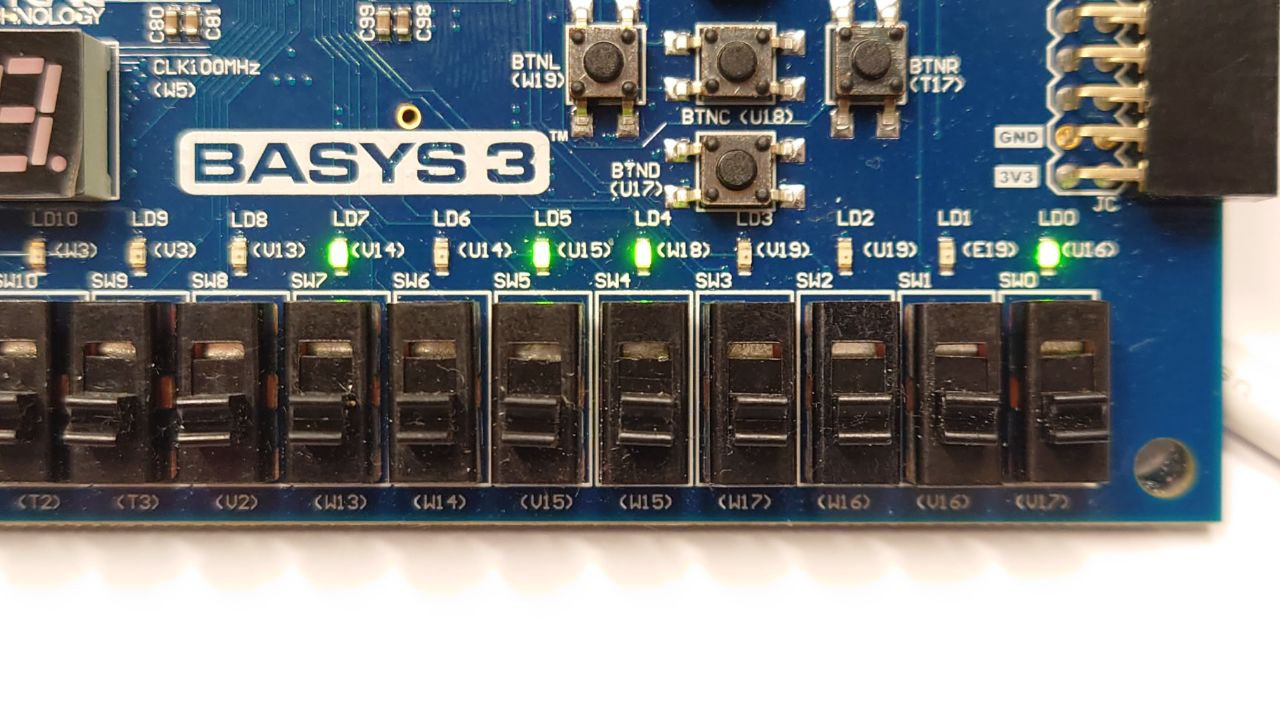

Switch 01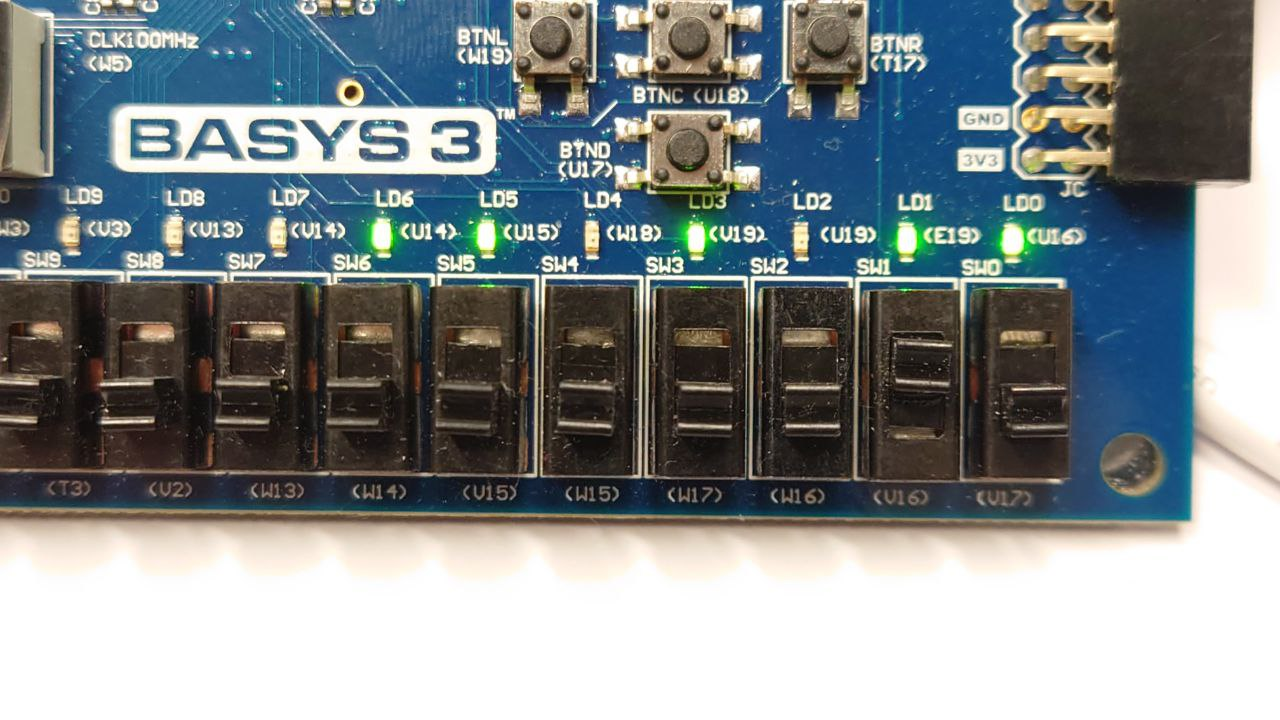

Switch 10
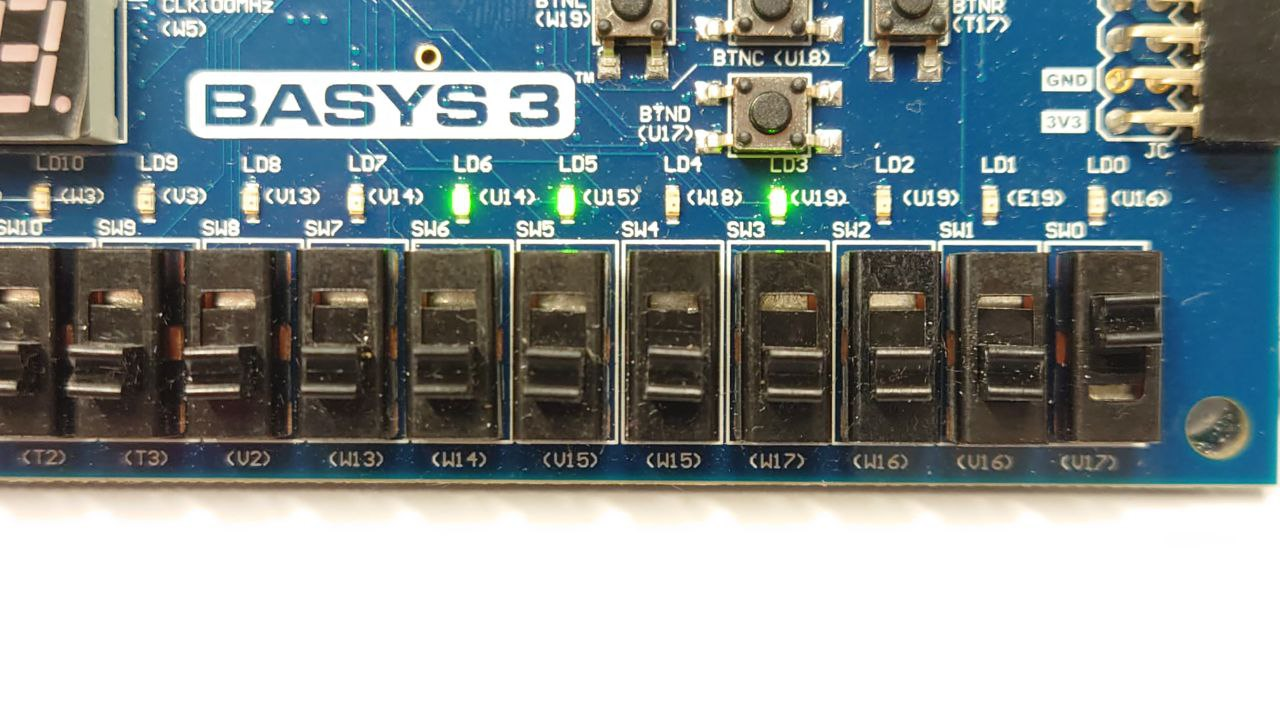

Switch 11
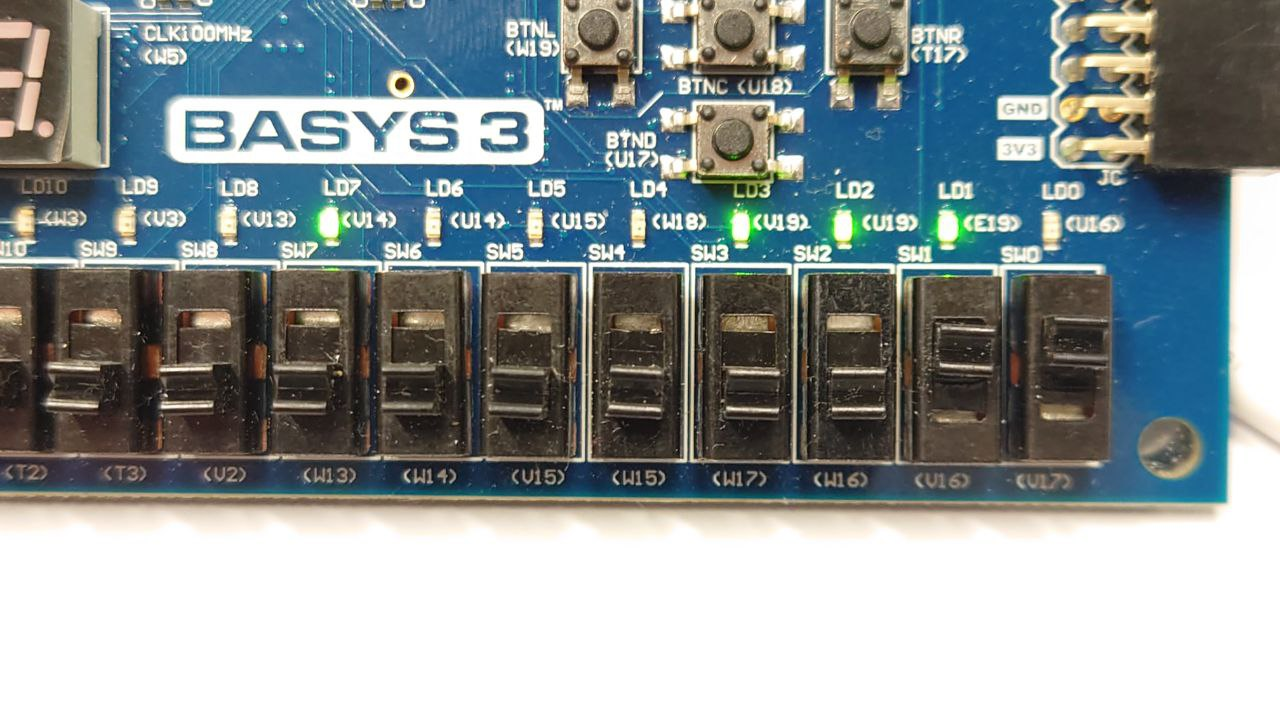

# **Logic-gate Code and Testbench**

For the logic gate FPGA, our code and testbench used in the program is shown below.


Installing. Please wait... done!


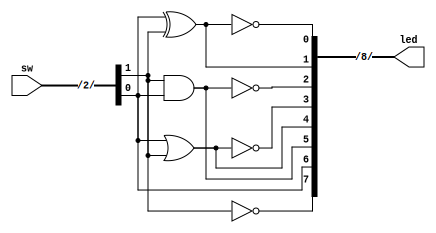

In [ ]:
%%print_verilog
module logicgates(led,sw);
output [0:7]led;
input [0:1]sw;

assign led[0] = ~sw[0];
assign led[1] = sw[1];
assign led[2] = sw[1] & sw[0];
assign led[3] = sw[1] | sw[0];
assign led[4] = ~(sw[0] | sw[1]);
assign led[5] = ~(sw[0] & sw[1]);
assign led[6] = sw[1] ^ sw[0];
assign led[7] = ~(sw[1] ^ sw[0]);

endmodule

In [ ]:
%%verilog
module tb();
wire [7:0]led;
reg [1:0]sw;

logicgates g1(led,sw);

initial begin
    $monitor("%d led=%b, sw=%b",$time,led,sw);
    $dumpfile("tb.vcd");
    $dumpvars();

        #0 sw = 2'b00;
        #2 sw = 2'b01;
        #2 sw = 2'b10;
        #2 sw = 2'b11;
        #2 $finish;

    $dumpoff;
end
endmodule

module logicgates(led,sw);
output [0:7]led;
input [0:1]sw;

assign led[0] = ~sw[0];
assign led[1] = sw[1];
assign led[2] = sw[1] & sw[0];
assign led[3] = sw[1] | sw[0];
assign led[4] = ~(sw[0] | sw[1]);
assign led[5] = ~(sw[0] & sw[1]);
assign led[6] = sw[1] ^ sw[0];
assign led[7] = ~(sw[1] ^ sw[0]);

endmodule

VCD info: dumpfile tb.vcd opened for output.
                   0 led=10001101, sw=00
                   2 led=11010110, sw=01
                   4 led=00010110, sw=10
                   6 led=01110001, sw=11



**Waveform**

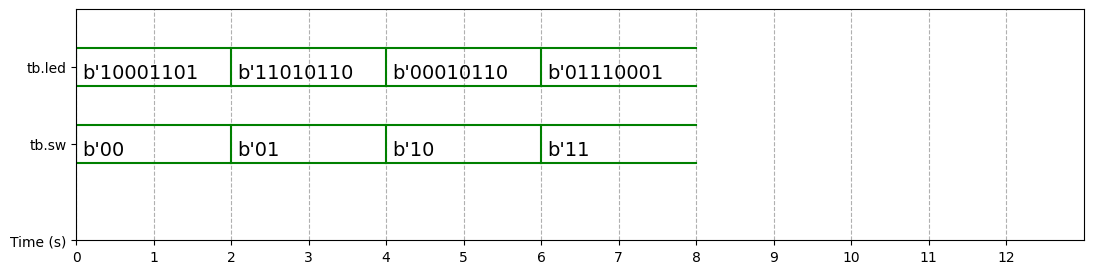

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.led','tb.sw']
time_begin = 0
time_end = 12
base = 'bin' # bin, dec, dec2, hex, octal

In our initial design, we started with creating a module for each indiviual gate and collating the modules together (as can be see in the appendix). This led to a very long code that we decided to simplify by settling all the bits of the led and switch in 1 module rather than 8 different modules.

# **Implementation into FPGA using Vivado**

After verifying on the ipynb, we transfered the code into vivado with the appropriate constraints

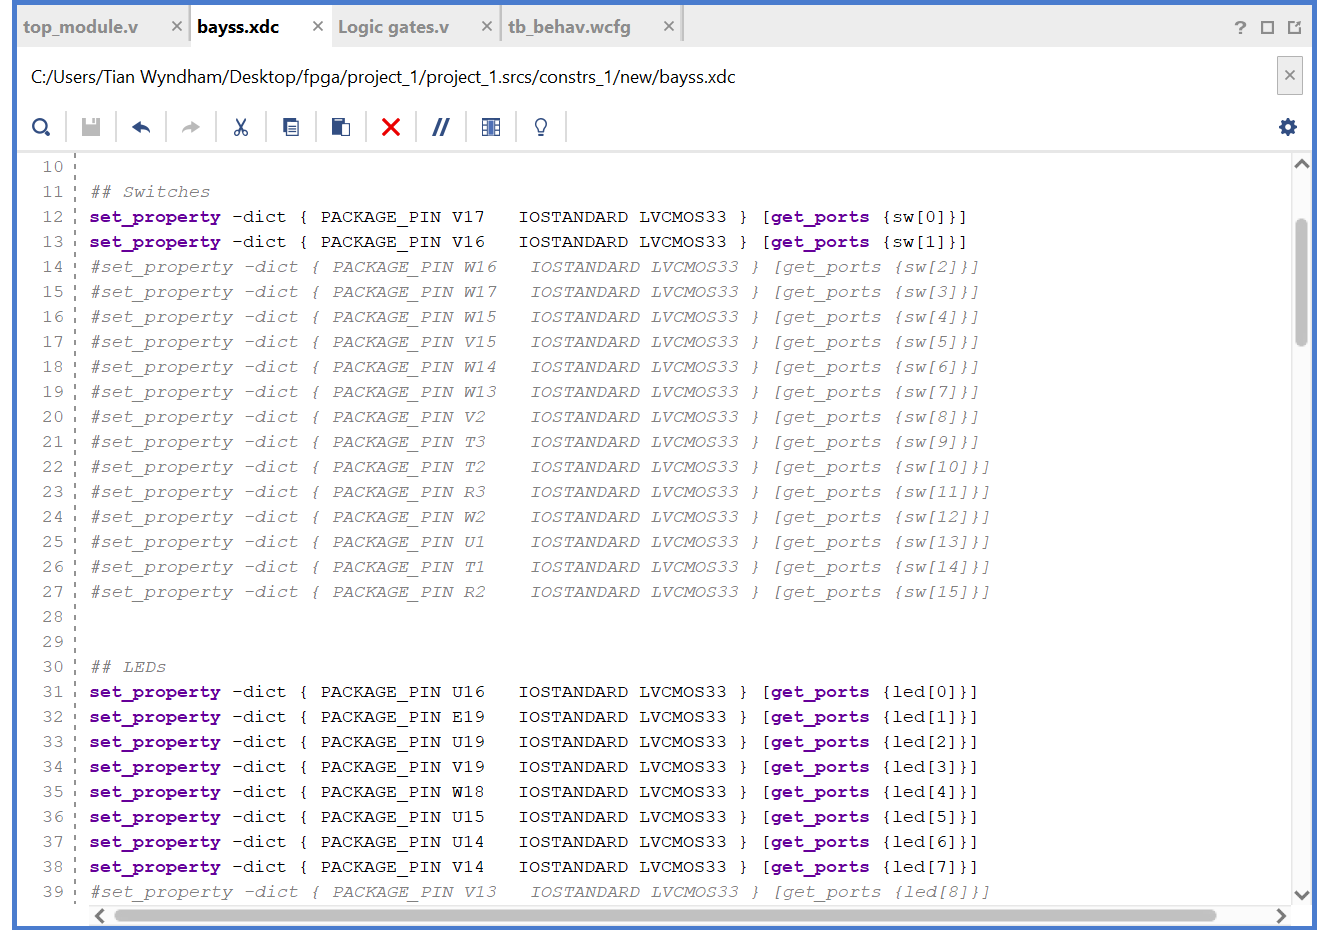

Constraints set to allow 2 bit switch and 8 bit LED display

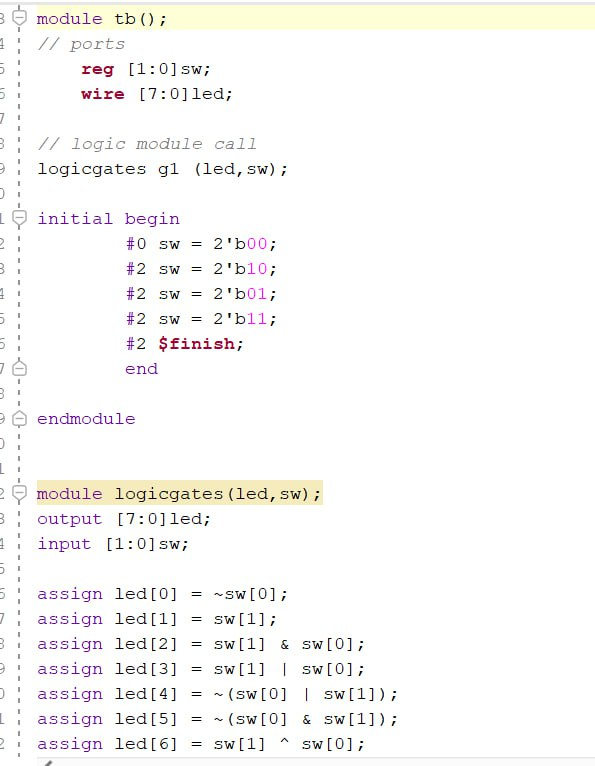

Code in vivado simulation source

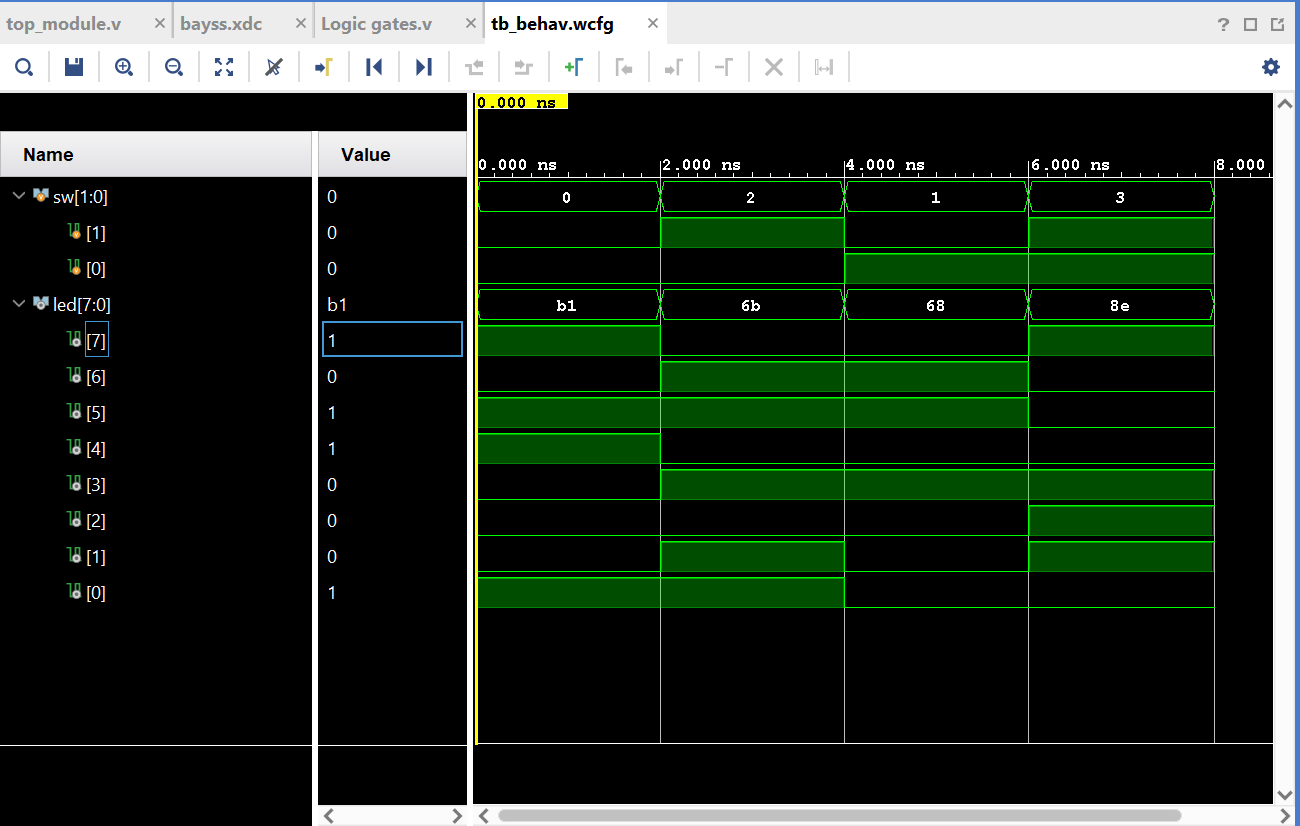

Waveform from simulation

After ensuring the logic worked in vivado simulation, Linter and Synthesis was done to prepare bitstream.

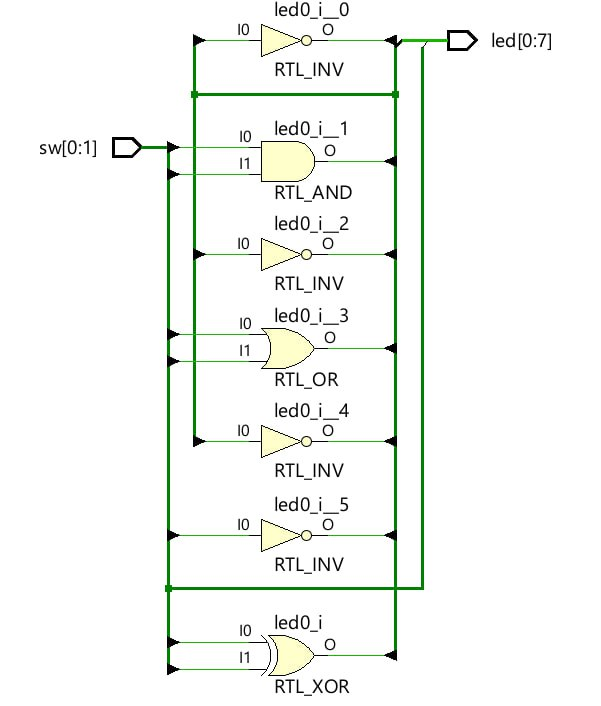

Schematic from Linter

A change to the virtual board was required as there was an error in sythesis with port selection. It required us to have the virtual board used by Vivado to not be the Basys 3 board but specifically the part used by the board. The final bitstream was generated and the physical FPGA was tested as seen in the FPGA logic video and photos as seen at the start of this report.

# **Design challenges and AI usage**

In this hands-on project, we coded logic gates in Verilog using Google Colab, targeting the Basys 3 FPGA via Vivado. While Colab’s built-in Gemini AI offered autofill, we avoided it, instead using Grok 3 to query and clarify syntax issues. This supported our learning without writing code for us, allowing us to better understand how to code Verilog.

The primary challenge was integrating individual gate modules our team members coded into a glitch-free main code. Testbenches in Colab helped, but deploying to Vivado revealed issues: the software struggled to recognize the Basys 3, and some team members lacked Windows laptops, forcing us to share one for final FPGA downloading. After troubleshooting connectivity (with Professor's guidance) and adjusting constraints, we resolved compatibility errors and successfully toggled switches to light the LEDs in the Basys 3 FPGA.

In conclusion, we used AI to aid syntax comprehension, but hardware challenges required hands-on troubleshooting that promoted learning. This project demonstrated teamwork and problem-solving, bridging simulation to physical implementation.



# **Appendix**

Indiviual modules

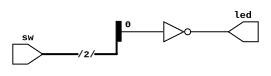

In [ ]:
%%print_verilog
//indiv module for gate0
module not_a(led,sw);
    output led;
    input [1:0]sw;

    assign led = ~sw[0];

endmodule
//


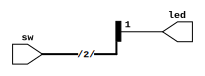

In [ ]:
%%print_verilog
//indiv module for gate1
module buf_b(led,sw);
    output led;
    input [1:0]sw;

    assign led = sw[1];

endmodule
//


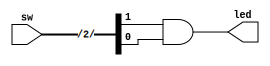

In [ ]:
%%print_verilog
//
module AND_gate(
    input [1:0]sw,      // 2-bit input (sw[1], sw[0]), use 1 bit only
    output led     // 8-bit output (led[7:0]), use 1 bit only
);
    // Logic gate implementations
    assign led = sw[1] & sw[0];       // AND gate
endmodule
//

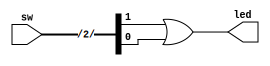

In [ ]:
%%print_verilog
//
module OR_gate(
    input [1:0]sw,      // 2-bit input (sw[1], sw[0]), use 1 bit only
    output led     // 8-bit output (led[7:0]), use 1 bit only
);
    // Logic gate implementations
    assign led = sw[1] | sw[0];       // OR gate led[3]
endmodule
//

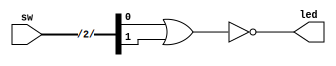

In [ ]:
%%print_verilog
//indiv module for gate4

module nor_gate (
    input [1:0] sw,  // 2-bit input (sw[1], sw[0])
    output led       // 1-bit output (led)
);

    assign led = ~(sw[0] | sw[1]); // NOR operation

endmodule




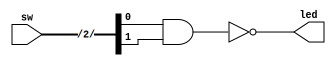

In [ ]:
%%print_verilog
//indiv module for gate5

module nand_gate(
    input [1:0] sw,      // 2-bit input (sw[1], sw[0]), use 2 bit only
    output led     // 1-bit output (led), use 1 bit only
);

    assign led = ~(sw[0] & sw[1]);   // NAND

endmodule

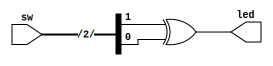

In [ ]:
%%print_verilog
//indiv module for gate6
module logic_gate6(
    input [1:0] sw,    // 2-bit input
    output led         // 1-bit output
);
    assign led = sw[1] ^ sw[0];    // XOR gate
endmodule

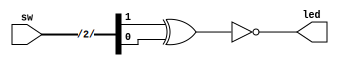

In [ ]:
%%print_verilog
//indiv module for gate7
module logic_gate7(
    input [1:0] sw,    // 2-bit input
    output led         // 1-bit output
);
    assign led = ~(sw[1] ^ sw[0]); // XNOR gate
endmodule

Combined modules

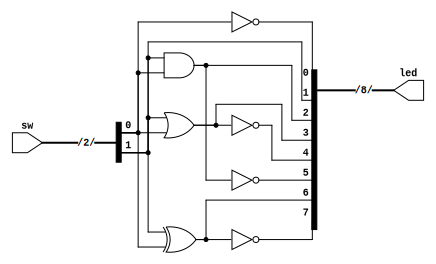

In [ ]:
%%print_verilog
module swtoled(sw,led);
input [1:0]sw;
output [7:0]led;

// logic

not_a g1 (led[0],sw);
buf_b g2 (led[1],sw);
AND_gate g3 (sw,led[2]);
OR_gate g4 (sw,led[3]);
nor_gate g5 (sw,led[4]);
nand_gate g6 (sw,led[5]);
logic_gate6 g7 (sw,led[6]);
logic_gate7 g8 (sw,led[7]);

endmodule





module not_a(led,sw);
    output led;
    input [1:0]sw;

    assign led = ~sw[0];

endmodule
//

module buf_b(led,sw);
    output led;
    input [1:0]sw;

    assign led = sw[1];

endmodule
//

module AND_gate(
    input [1:0]sw,      // 2-bit input (sw[1], sw[0]), use 1 bit only
    output led     // 8-bit output (led[7:0]), use 1 bit only
);
    // Logic gate implementations
    assign led = sw[1] & sw[0];       // AND gate
endmodule
//
//
module OR_gate(
    input [1:0]sw,      // 2-bit input (sw[1], sw[0]), use 1 bit only
    output led     // 8-bit output (led[7:0]), use 1 bit only
);
    // Logic gate implementations
    assign led = sw[1] | sw[0];       // OR gate led[3]
endmodule
//
module nor_gate (
    input [1:0] sw,  // 2-bit input (sw[1], sw[0])
    output led       // 1-bit output (led)
);

    assign led = ~(sw[0] | sw[1]); // NOR operation

endmodule
module nand_gate(
    input [1:0] sw,      // 2-bit input (sw[1], sw[0]), use 2 bit only
    output led     // 1-bit output (led), use 1 bit only
);

    assign led = ~(sw[0] & sw[1]);   // NAND

endmodule
module logic_gate6(
    input [1:0] sw,    // 2-bit input
    output led         // 1-bit output
);
    assign led = sw[1] ^ sw[0];    // XOR gate
endmodule
module logic_gate7(
    input [1:0] sw,    // 2-bit input
    output led         // 1-bit output
);
    assign led = ~(sw[1] ^ sw[0]); // XNOR gate
endmodule

Testbench

In [ ]:
%%verilog
module tb();
wire [7:0]led;
reg [1:0]sw;

swtoled g1(sw,led);

initial begin
    $monitor("%d led=%b, sw=%b",$time,led,sw);
    $dumpfile("tb.vcd");
    $dumpvars();

        #0 sw = 2'b00;
        #2 sw = 2'b01;
        #2 sw = 2'b10;
        #2 sw = 2'b11;
        #2 $finish;

    $dumpoff;
end
endmodule

module swtoled(sw,led);
input [1:0]sw;
output [7:0]led;

// logic

not_a g1 (led[0],sw);
buf_b g2 (led[1],sw);
AND_gate g3 (sw,led[2]);
OR_gate g4 (sw,led[3]);
nor_gate g5 (sw,led[4]);
nand_gate g6 (sw,led[5]);
logic_gate6 g7 (sw,led[6]);
logic_gate7 g8 (sw,led[7]);

endmodule





module not_a(led,sw);
    output led;
    input [1:0]sw;

    assign led = ~sw[0];

endmodule
//

module buf_b(led,sw);
    output led;
    input [1:0]sw;

    assign led = sw[1];

endmodule
//

module AND_gate(
    input [1:0]sw,      // 2-bit input (sw[1], sw[0]), use 1 bit only
    output led     // 8-bit output (led[7:0]), use 1 bit only
);
    // Logic gate implementations
    assign led = sw[1] & sw[0];       // AND gate
endmodule
//
//
module OR_gate(
    input [1:0]sw,      // 2-bit input (sw[1], sw[0]), use 1 bit only
    output led     // 8-bit output (led[7:0]), use 1 bit only
);
    // Logic gate implementations
    assign led = sw[1] | sw[0];       // OR gate led[3]
endmodule
//
module nor_gate (
    input [1:0] sw,  // 2-bit input (sw[1], sw[0])
    output led       // 1-bit output (led)
);

    assign led = ~(sw[0] | sw[1]); // NOR operation

endmodule
module nand_gate(
    input [1:0] sw,      // 2-bit input (sw[1], sw[0]), use 2 bit only
    output led     // 1-bit output (led), use 1 bit only
);

    assign led = ~(sw[0] & sw[1]);   // NAND

endmodule
module logic_gate6(
    input [1:0] sw,    // 2-bit input
    output led         // 1-bit output
);
    assign led = sw[1] ^ sw[0];    // XOR gate
endmodule
module logic_gate7(
    input [1:0] sw,    // 2-bit input
    output led         // 1-bit output
);
    assign led = ~(sw[1] ^ sw[0]); // XNOR gate
endmodule

VCD info: dumpfile tb.vcd opened for output.
                   0 led=10110001, sw=00
                   2 led=01101000, sw=01
                   4 led=01101011, sw=10
                   6 led=10001110, sw=11



Waveform

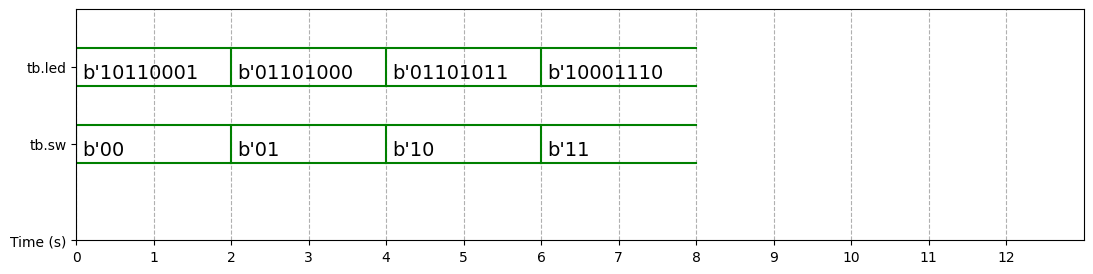

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.led','tb.sw']
time_begin = 0
time_end = 12
base = 'bin' # bin, dec, dec2, hex, octal